# Import Libraries

In [1]:
import os
import tensorflow
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image
from tensorflow.keras.utils import plot_model

# Keras Library for Neural Networks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score, confusion_matrix

# Filter out Warnings, Errors or Info so they do not print
import warnings
warnings.filterwarnings('ignore')
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Using TensorFlow backend.


# Get Current Working Directory

In [2]:
os.getcwd()

'/Users/carloswilwayco/dsir_222_wc/capstone/computer_vision_and_distracted_driving'

# Setting Local Machine Paths

In [3]:
path = '/Users/carloswilwayco/dsir_222_wc/capstone/computer_vision_and_distracted_driving'
train_path = './imgs/train/'
test_path = './imgs/test/'
model_path = './models/'

# Test paths if they're working properly

In [4]:


if not os.path.exists(path):
    print("Path does not exist")
if not os.path.exists(train_path):
    print("Training data directory does not exist")
if not os.path.exists(test_path):
    print("Testing data directory does not exist")
if not os.path.exists(model_path):
    print("Model path does not exists")

# Read in csv file of the driver_imgs_list.csv

In [5]:
dataset = pd.read_csv(path + '/driver_imgs_list.csv')
dataset.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


# Dictionary Map for Driver Activity and sets corresponding numbers as labels

In [6]:
drivers = {'c0': 'Safe driving', 
           'c1': 'Texting - right', 
           'c2': 'Talking - right',
           'c3': 'Texting - left',
           'c4': 'Talking - left', 
           'c5': 'Operating radio', 
           'c6': 'Drinking', 
           'c7': 'Reaching behind', 
           'c8': 'Hair and makeup', 
           'c9': 'Talking - passenger'}

# Set .plt style

In [7]:
plt.style.use('dark_background') # returns plots de be used with dark/black notebook backgrounds
#plt.style.use('default') # use with light/white notebook backgrounds (plots look better on slide decks)

# Function that takes extracts image from our train folder

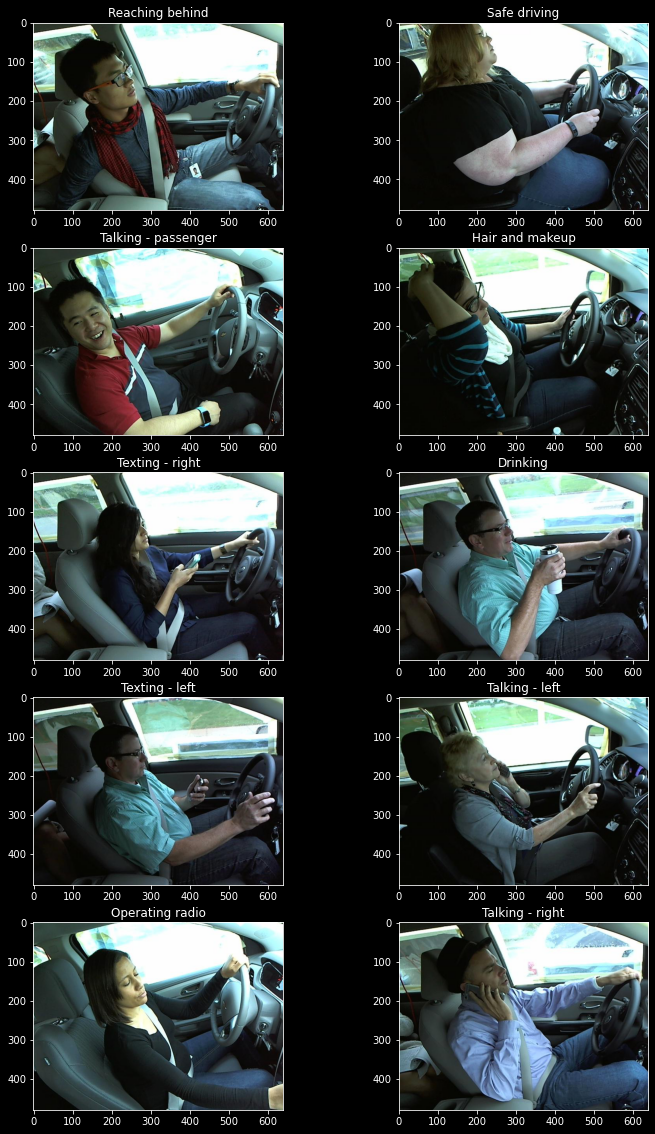

In [8]:
# can be grayscaled,


plt.figure(figsize = (12, 20))
image_count = 1
train = train_path
for directory in os.listdir(train):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(train + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(5, 2, image_count)
                image_count += 1
                image = mpimg.imread(train + directory + '/' + file)
                plt.imshow(image) #,cmap='gray_r') gray # gre
                plt.title(drivers[directory])

In [9]:
model = Sequential()

# Three rounds of feature selection and pooling (Three Convolutional Layers + Two Max Pooling 2D Layers)
model.add(Conv2D(filters = 128, #128
                 kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = (240, 240, 3), #240,240,3            
                 data_format = 'channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2))) # Leave pool

# Second Convolutional Layer
model.add(Conv2D(filters = 64,              
                 kernel_size = (3, 3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters = 32, 
                 kernel_size = (3, 3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the Dense Layer (Change from a matrix)
model.add(Flatten())

# Two Dense Layers
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))

# Output Layer
model.add(Dense(units = 10, activation = 'sigmoid'))

# Compile Model
model.compile(optimizer = 'adam',
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

# Get Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 238, 238, 128)     3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 119, 119, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

Here we can see that there were a total of 26,051,946 params and we can train all of them.

# Plot Model

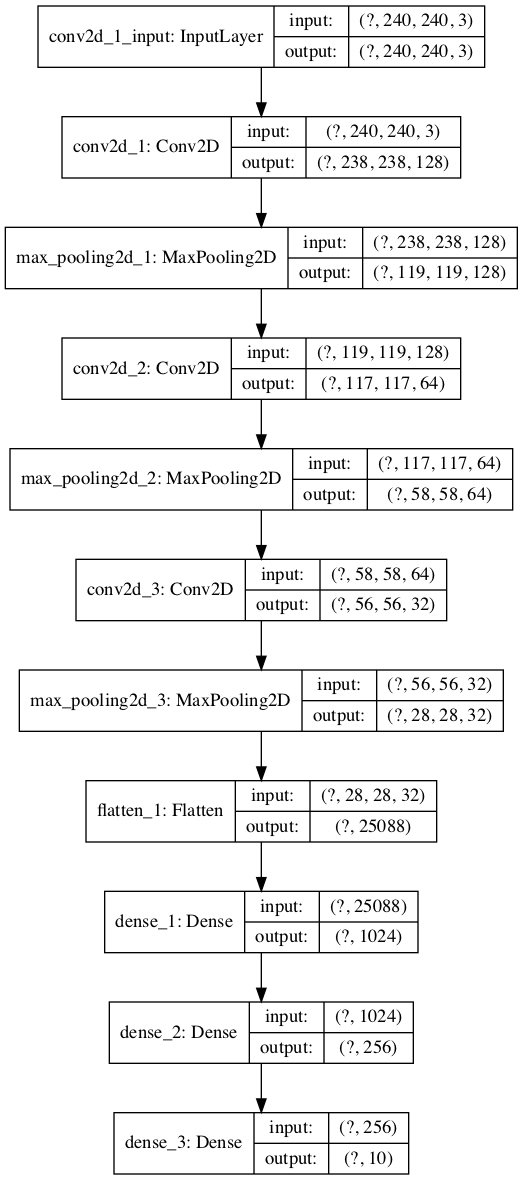

In [10]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# ImageDataGenerator to augment train and validation samples

In [11]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   validation_split = 0.2)

training = train_datagen.flow_from_directory('./imgs/train', 
                                             target_size = (240, 240), # leave 240,240
                                             batch_size = 32,
                                             subset = 'training')

validation = train_datagen.flow_from_directory('./imgs/train', 
                                               target_size = (240, 240), 
                                               batch_size = 32,
                                               subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


final = model.fit_generator(training,
#                            steps_per_epoch = 17943/32, # run without until last iterations of model training/tuning
                            epochs = 10,
                            validation_data = validation)#,
#                            validation_steps = 4481/32)

# Save Model as .h5 format

In [12]:
#model.save('./models/final_model.h5')

In [13]:
preds = model.predict(validation)

KeyboardInterrupt: 

In [ ]:
preds[:5]

In [ ]:
train_loss = final.history['loss']
test_loss = final.history['val_loss']
train_acc = final.history['accuracy']
test_acc = final.history['val_accuracy']

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))


ax1.set_title('Loss', size = 20)
ax1.set_xlabel('Epochs', size=14)
ax1.set_ylabel('Loss', size=14)

ax1.plot(train_loss, label='Training loss')
ax1.plot(test_loss, label='Testing loss')

ax2.set_title('Accuracy', size=20)
ax2.set_xlabel('Epochs', size=14)
ax2.set_ylabel('Accuracy', size=14)

ax2.plot(train_acc, label='Training accuracy')
ax2.plot(test_acc, label='Testing accuracy')

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)

plt.tight_layout()

In [ ]:
train_prec = final.history['precision']
test_prec = final.history['val_precision']
train_rec = final.history['recall_score']
test_rec = final.history['val_recall']

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

ax1.set_title('Precision', size=24)
ax1.set_xlabel('Epochs', size=18)
ax1.set_ylabel('Precision', size=18)

ax1.plot(train_prec, label='Training precision')
ax1.plot(test_prec, label='Testing precision')

ax2.set_title('Recall', size=24)
ax2.set_xlabel('Epochs', size=18)
ax2.set_ylabel('Recall', size=18)

ax2.plot(train_rec, label='Training recall')
ax2.plot(test_rec, label='Testing recall')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)

plt.tight_layout()